In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# EDA

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Columns
1. customer_id : 계좌번호
2. credit_score : 신용점수
1. country : 거주국가
2. gender : 성별
1. age : 나이
2. tenure : 은행 이용기간
1. balance : 계좌잔고
2. products_number : 은행상품수
1. credit_card : 신용카드수
2. active_member : 활동고객여부
1. estimated_salary : 추정급여
2. churn : 이탈여부


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

카테고리형 변수 분포 확인

<Axes: xlabel='churn', ylabel='count'>

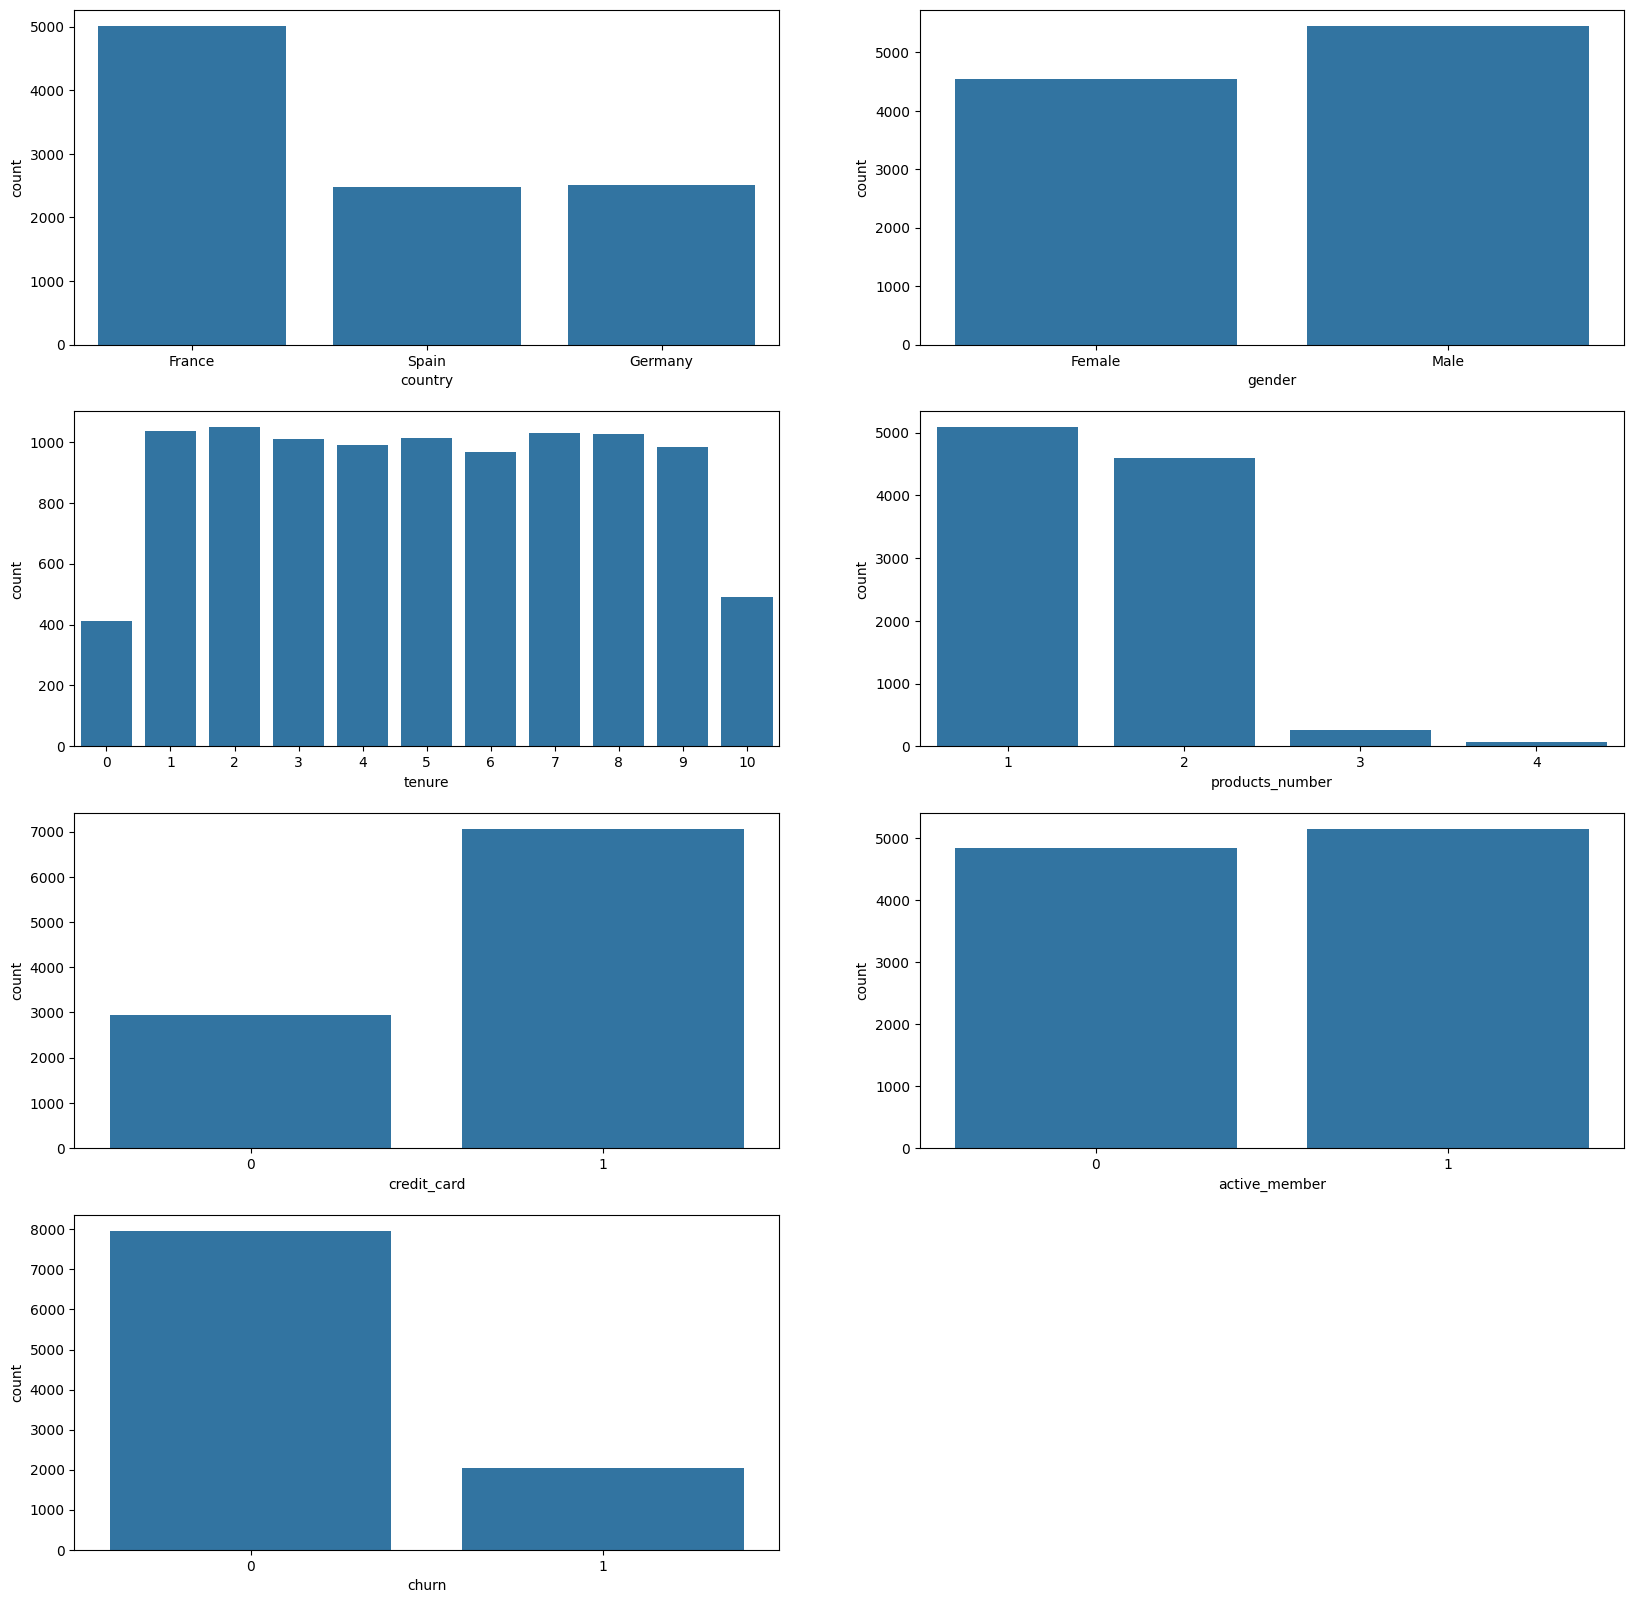

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.countplot(x = 'country', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', data = df)

수치형 변수 분포 확인

<ipython-input-13-31b6d8542ad7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])
<ipython-input-13-31b6d8542ad7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-13-31b6d8542ad7>:10: UserWarning: 

`distplot` is a deprecated function and will be remo

<Axes: xlabel='estimated_salary', ylabel='Density'>

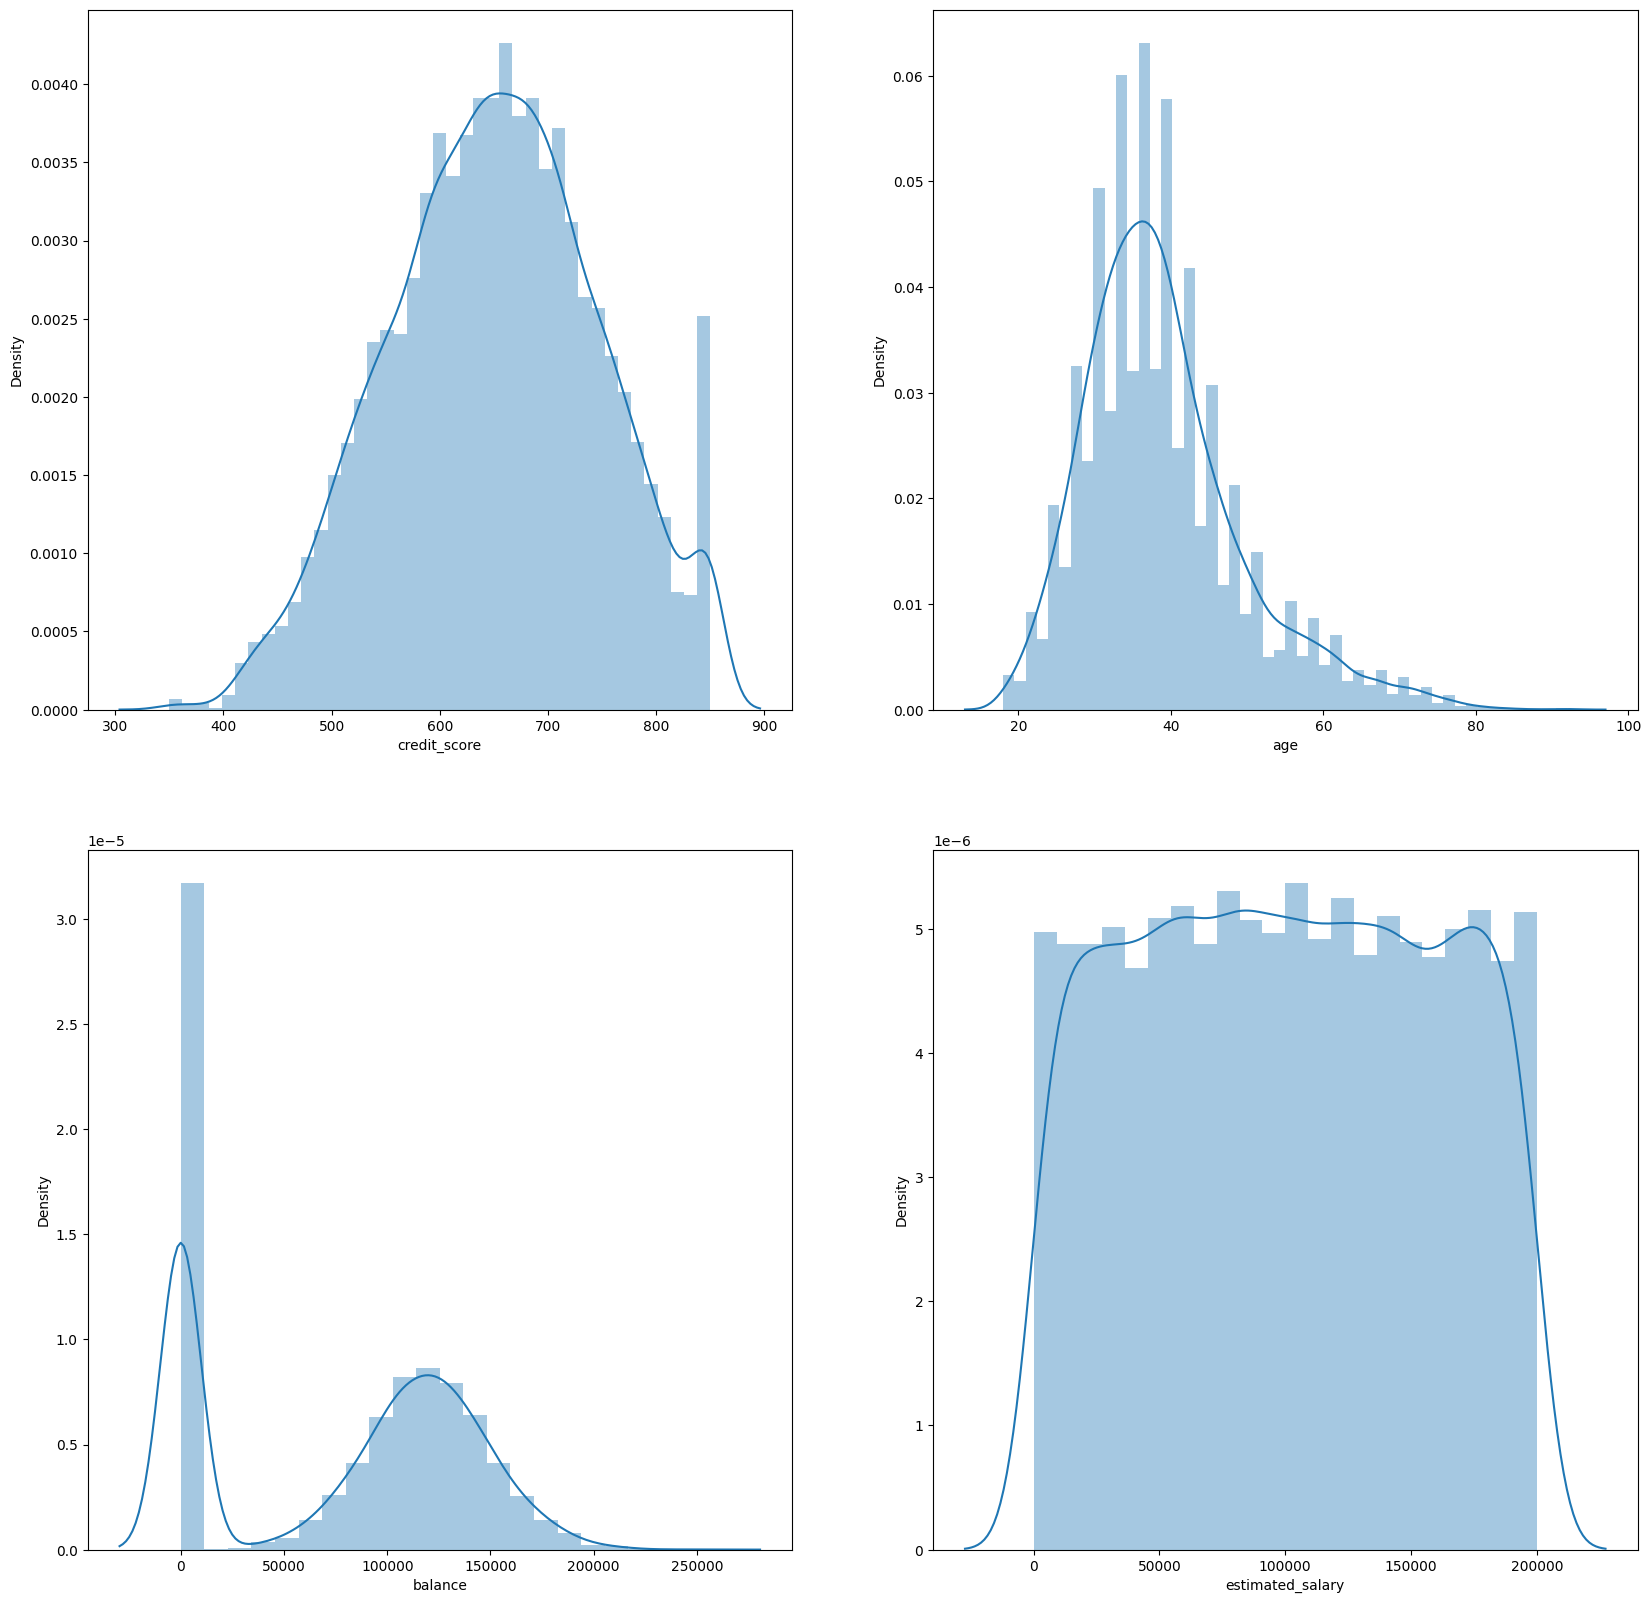

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.distplot(df['credit_score'])

plt.subplot(2,2,2)
sns.distplot(df['age'])

plt.subplot(2,2,3)
sns.distplot(df['balance'])

plt.subplot(2,2,4)
sns.distplot(df['estimated_salary'])

credit_score의 최댓값인 고객이 분포에 비해 많다.

In [ ]:
max_credit_score = df['credit_score'].max()
max_credit_score_df = df[df['credit_score'] == max_credit_score]

In [ ]:
max_credit_score_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,15717426,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,15716334,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,15604482,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,15733247,850,France,Male,33,10,0.00,1,1,0,4861.72,1


In [ ]:
max_credit_score_df['churn'].value_counts()

0    190
1     43
Name: churn, dtype: int64

balance가 0인 고객도 분포에 비해 많다.

In [ ]:
balance_zero_df = df[df['balance'] == 0]

In [ ]:
balance_zero_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0


In [ ]:
balance_zero_df['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

필드 간 상관관계

In [ ]:
correlation = df.corr()

<ipython-input-19-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


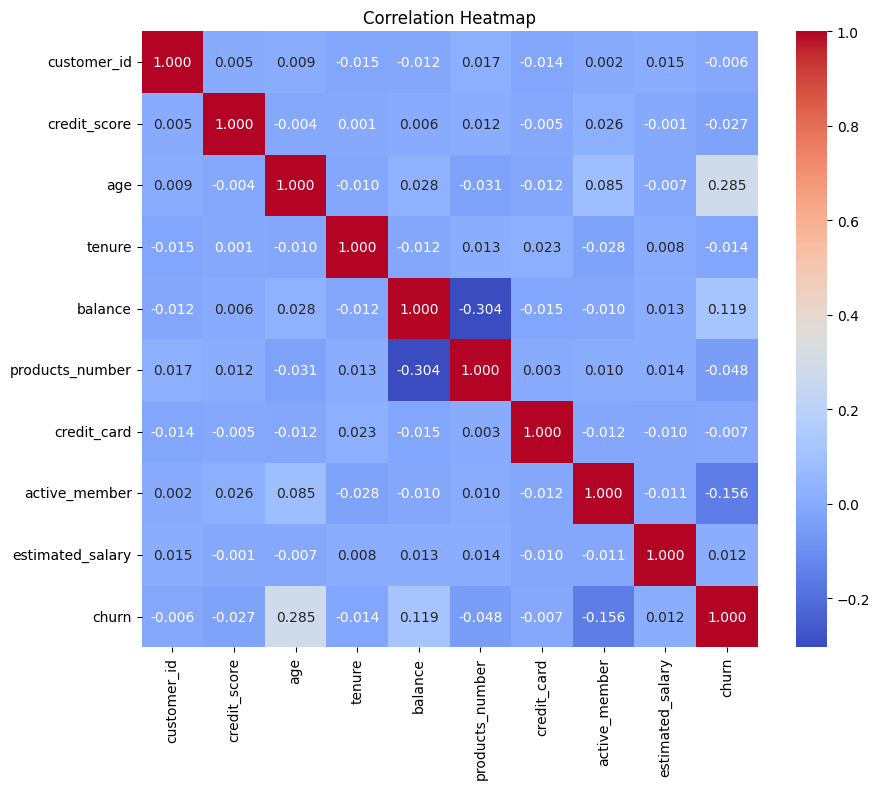

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".3f", square = True)
plt.title('Correlation Heatmap')
plt.show()

그나마 나이와 이탈자 간의 상관계수가 커서 이탈자와 비이탈자의 나이 분포를 확인해봤다.

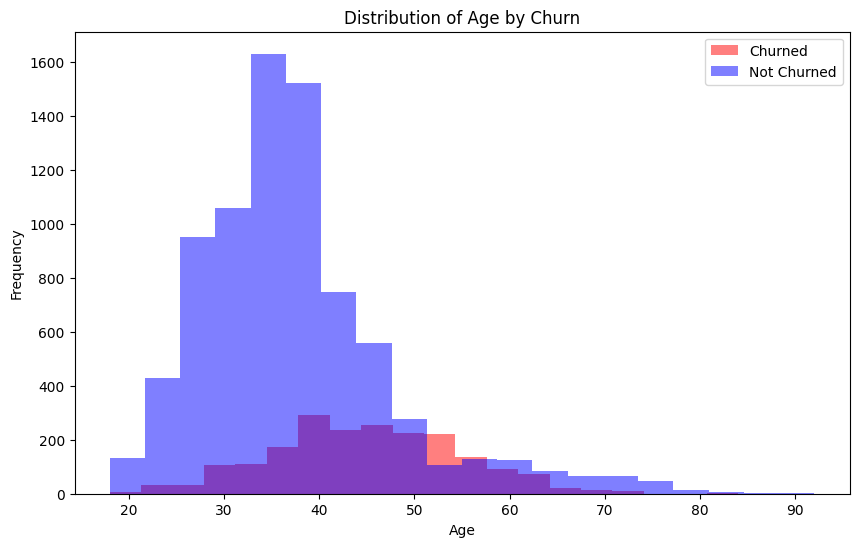

In [ ]:
age_churn_df = df[['age', 'churn']]

churned = age_churn_df[age_churn_df['churn'] == 1]['age']

not_churned = age_churn_df[age_churn_df['churn'] == 0]['age']

plt.figure(figsize=(10, 6))
plt.hist(churned, bins=20, alpha=0.5, color='red', label='Churned')
plt.hist(not_churned, bins=20, alpha=0.5, color='blue', label='Not Churned')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Churn')
plt.legend()
plt.show()

상관계수를 볼 수 없는 문자형 변수인 country와 gender의 이탈률을 확인

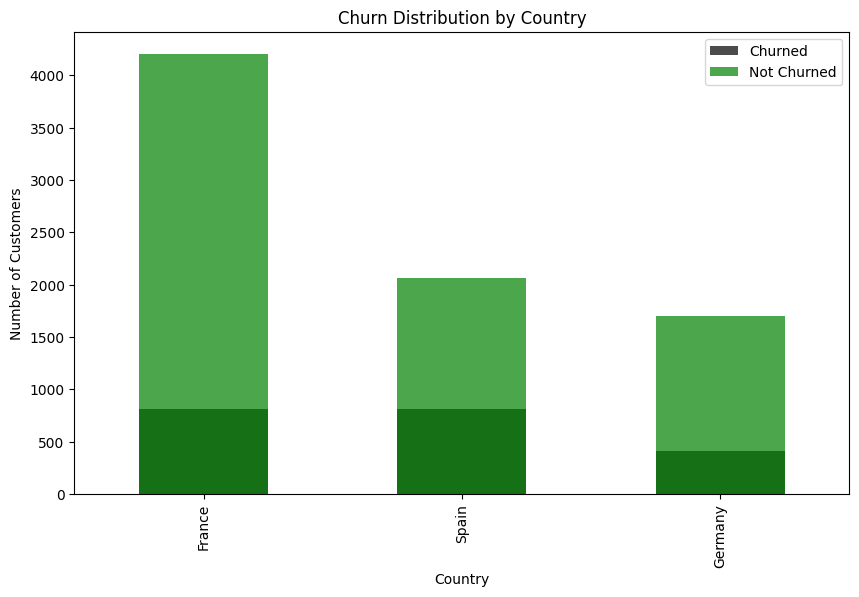

In [ ]:
country_churn_df = df[['country', 'churn']]

churned_counts = country_churn_df[country_churn_df['churn'] == 1]['country'].value_counts()
not_churned_counts = country_churn_df[country_churn_df['churn'] == 0]['country'].value_counts()

plt.figure(figsize=(10, 6))
churned_counts.plot(kind='bar', color='black', alpha=0.7, label='Churned')
not_churned_counts.plot(kind='bar', color='green', alpha=0.7, label='Not Churned')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Country')
plt.legend()
plt.show()

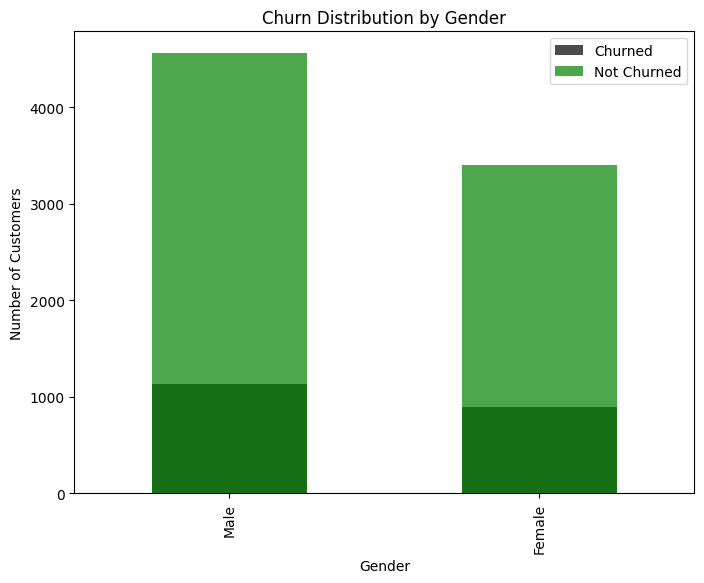

In [ ]:
gender_churn_df = df[['gender', 'churn']]

churned_counts = gender_churn_df[gender_churn_df['churn'] == 1]['gender'].value_counts()
not_churned_counts = gender_churn_df[gender_churn_df['churn'] == 0]['gender'].value_counts()

plt.figure(figsize=(8, 6))
churned_counts.plot(kind='bar', color='black', alpha=0.7, label='Churned')
not_churned_counts.plot(kind='bar', color='green', alpha=0.7, label='Not Churned')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Gender')
plt.legend()
plt.show()

# 데이터 전처리

In [ ]:
# 새로운 데이터프레임 생성
new_df = df.drop(['customer_id', 'country'], axis=1)  # customer_id와 country 열 삭제

# gender를 0과 1로 변환
new_df['gender'] = new_df['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
new_df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


# 모델 빌딩 연습

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [ ]:
X = new_df[['credit_score','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]
y = new_df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [ ]:
lr = LogisticRegression(random_state=1)

In [ ]:
log_reg = lr.fit(X_scaled, y_train)

In [ ]:
reg = lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
expected   = y_test
predicted  = log_reg.predict(X_test_scaled)

In [ ]:
classificationReport = classification_report(expected, predicted)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1590
           1       0.59      0.17      0.27       410

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [ ]:
predicted_prob = log_reg.predict_proba(X_test_scaled)

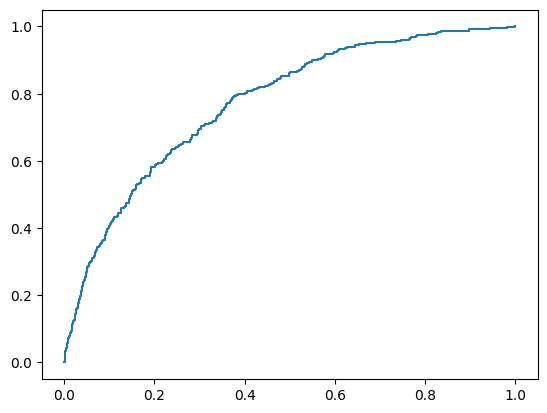

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr,tpr,_ = roc_curve(expected, predicted_prob[:,1])
plt.plot(fpr,tpr)

In [ ]:
auc(fpr, tpr)

0.773106304647952

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# 예측 수행
y_train_pred_logis = log_reg.predict(X_train)
y_test_pred_logis = log_reg.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred_logis)
acc_test = accuracy_score(y_test, y_test_pred_logis)

print(f'학습 데이터를 이용한 Acc 값 : {acc_train*100:.1f}%')
print(f'평가 데이터를 이용한 Acc 값 : {acc_test*100:.1f}%')

학습 데이터를 이용한 Acc 값 : 20.3%
평가 데이터를 이용한 Acc 값 : 20.5%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


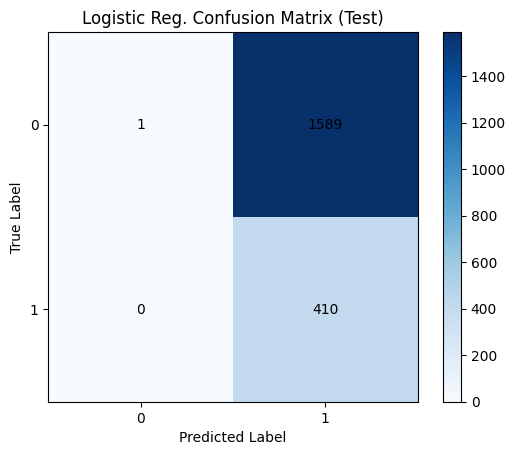

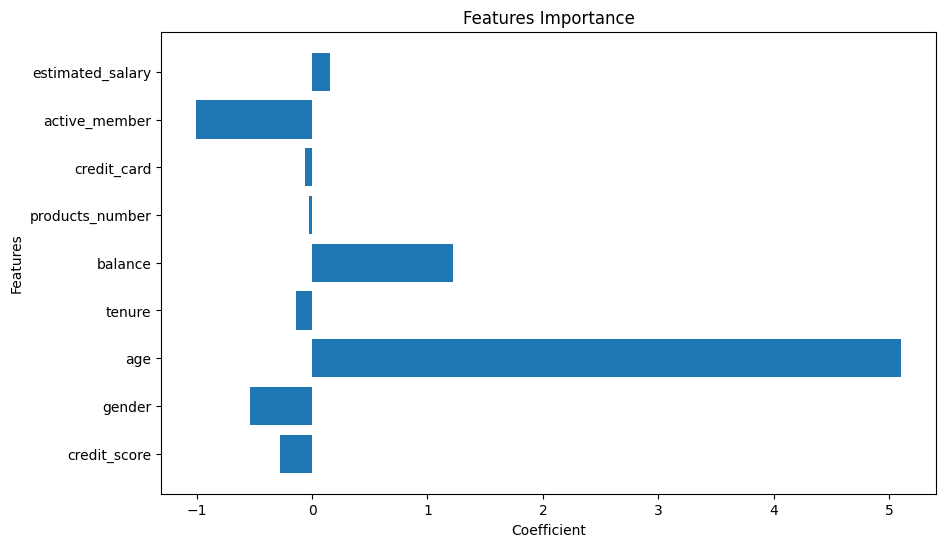

In [ ]:
# Confusion matrix 생성을 위한 준비
from sklearn.metrics import confusion_matrix

cm_test_logis = confusion_matrix(y_test, y_test_pred_logis)

# 평가 데이터를 활용한 confusion matrix
import matplotlib.pyplot as plt

plt.imshow(cm_test_logis, interpolation='nearest', cmap='Blues')
plt.title("Logistic Reg. Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_test_logis.shape[0]):
    for j in range(cm_test_logis.shape[1]):
        plt.text(j, i, cm_test_logis[i, j], ha="center", va="center", color="black")

# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, log_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.1)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=0.1)

In [ ]:
# 예측 수행
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred_svm)
acc_test = accuracy_score(y_test, y_test_pred_svm)

print(f'학습 데이터를 이용한 SVM Acc 값 : {acc_train*100:.1f}%')
print(f'평가 데이터를 이용한 SVM Acc 값 : {acc_test*100:.1f}%')

학습 데이터를 이용한 SVM Acc 값 : 79.7%
평가 데이터를 이용한 SVM Acc 값 : 79.5%


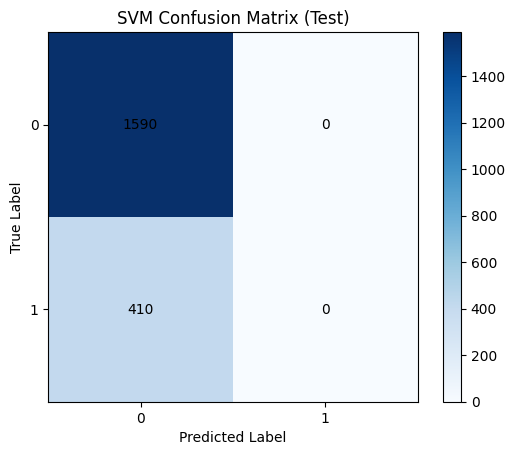

In [ ]:
# confusion matrix을 활용한 평가 결과 확인
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)

plt.imshow(cm_test_svm, interpolation='nearest', cmap='Blues')
plt.title("SVM Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_test_svm.shape[0]):
    for j in range(cm_test_svm.shape[1]):
        plt.text(j, i, cm_test_svm[i, j], ha="center", va="center", color="black")

In [ ]:
# 정밀도, 재현율, F1 값 비교
from sklearn.metrics import precision_score, recall_score, f1_score

logistic_precision = precision_score(y_test, y_test_pred_logis)
logistic_recall = recall_score(y_test, y_test_pred_logis)
logistic_f1 = f1_score(y_test, y_test_pred_logis)
print(f'Logistic의 P,R,F1 : {logistic_precision:.2f} / {logistic_recall:.2f} / {logistic_f1:.2f}')


svm_precision = precision_score(y_test, y_test_pred_svm)
svm_recall = recall_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)
print(f'SVM의 P,R,F1 : {svm_precision:.2f} / {svm_recall:.2f} / {svm_f1:.2f}')

Logistic의 P,R,F1 : 0.21 / 1.00 / 0.34
SVM의 P,R,F1 : 0.00 / 0.00 / 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=5)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

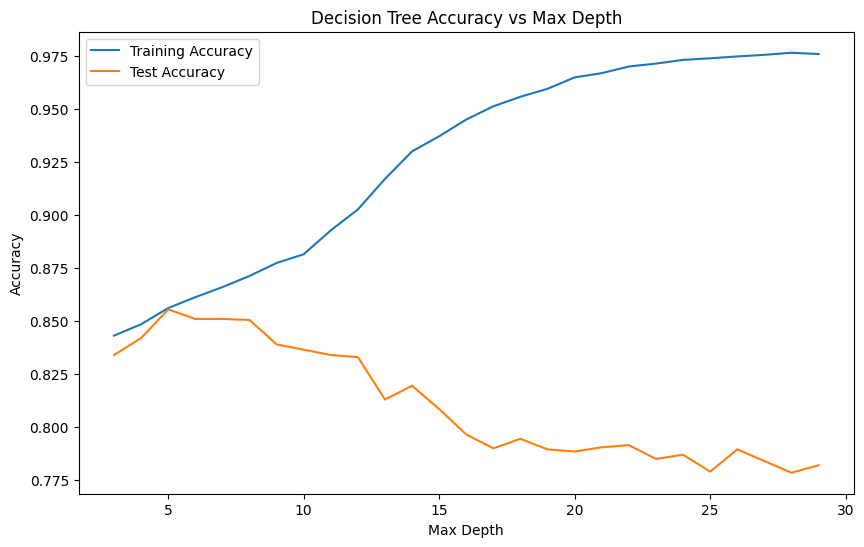

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=best_depth,
                            min_samples_split=5)

최대 정확도의 depth : 5


In [ ]:
# 예측 수행
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred_dt)
acc_test = accuracy_score(y_test, y_test_pred_dt)

print(f'학습 데이터를 이용한 DT Acc 값 : {acc_train*100:.1f}%')
print(f'평가 데이터를 이용한 DT Acc 값 : {acc_test*100:.1f}%')

학습 데이터를 이용한 DT Acc 값 : 85.6%
평가 데이터를 이용한 DT Acc 값 : 85.5%


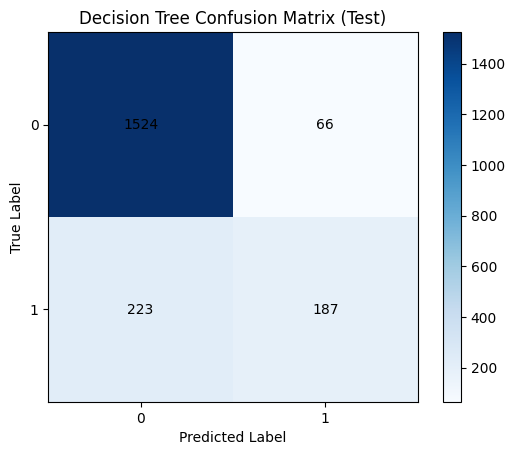

In [ ]:
# confusion matrix을 활용한 평가 결과 확인
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.imshow(cm_test_dt, interpolation='nearest', cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_test_dt.shape[0]):
    for j in range(cm_test_dt.shape[1]):
        plt.text(j, i, cm_test_dt[i, j], ha="center", va="center", color="black")

In [ ]:
# 정밀도, 재현율, F1 값 비교
from sklearn.metrics import precision_score, recall_score, f1_score

logistic_precision = precision_score(y_test, y_test_pred_logis)
logistic_recall = recall_score(y_test, y_test_pred_logis)
logistic_f1 = f1_score(y_test, y_test_pred_logis)
print(f'Logistic의 P,R,F1 : {logistic_precision:.2f} / {logistic_recall:.2f} / {logistic_f1:.2f}')


svm_precision = precision_score(y_test, y_test_pred_svm)
svm_recall = recall_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)
print(f'SVM의 P,R,F1 : {svm_precision:.2f} / {svm_recall:.2f} / {svm_f1:.2f}')


dt_precision = precision_score(y_test, y_test_pred_dt)
dt_recall = recall_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)
print(f'DT의 P,R,F1 : {dt_precision:.2f} / {dt_recall:.2f} / {dt_f1:.2f}')

Logistic의 P,R,F1 : 0.21 / 1.00 / 0.34
SVM의 P,R,F1 : 0.00 / 0.00 / 0.00
DT의 P,R,F1 : 0.74 / 0.46 / 0.56


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
